In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import smearing_tools as st


Ebins=[0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1,1.125,1.25,1.375,1.5,1.625,1.75,1.875,2,2.125,2.25,2.375,2.5,2.625,2.75,2.875,3,3.125,3.25,3.375,3.5,3.625,3.75,3.875,4,4.125,4.25,4.375,4.5,4.625,4.75,4.875,5,5.125,5.25,5.375,5.5,5.625,5.75,5.875,6,6.125,6.25,6.375,6.5,6.625,6.75,6.875,7,7.125,7.25,7.375,7.5,7.625,7.75,7.875,8,9,10,12,14,16,18,20]
#Ebins=[0.5,1.5,2.5,3.5,4.5]
#print(len(Ebins))
mA=st.smearingA(Ebins,0.05)
    
#mA.tolist()

In [2]:
a=np.array([1.0,2.0])
a/sum(a)

array([ 0.33333333,  0.66666667])

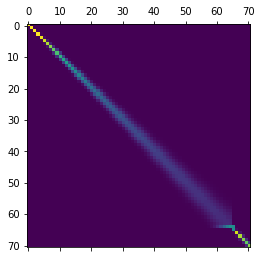

In [3]:
plt.matshow(mA)

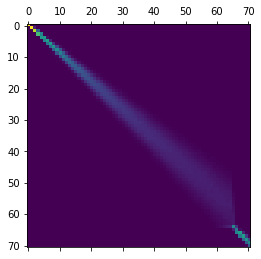

In [4]:

b=st.smearingB(Ebins,0.05,0.1)
plt.matshow(b)
#b.tolist()